# Herleitung

![](Biegelinie1.png)

Imports

In [1]:
from sympy import *
from sympy import init_printing
init_printing() 

Differentialgleichung definieren

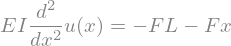

In [2]:
E,I,x,L,F =symbols('E I x L F')
u=symbols('u',cls=Function)
M=F*L+F*x
dglg=Eq(E*I*u(x).diff(x,2),-M)
dglg

Differentialgleichung lösen

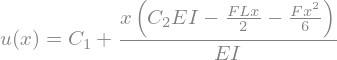

In [3]:
u=dsolve(dglg,u(x))
u

Integrationskonstanten mit Hilfe von Randbedingungen bestimmen

In [4]:
bed1 = u.rhs.subs(x,0) - 0
bed2 = u.rhs.diff(x).subs(x,0) - 0
C = solve([bed1,bed2])
C

Integrationskonstanten einsetzen

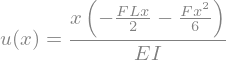

In [5]:
u = u.subs(C)
u

Gleichung vereinfachen

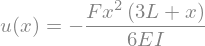

In [6]:
u.simplify()

Daten einsetzen

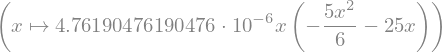

In [7]:
data=[(F,5),(L,10),(E,210e3),(I,1)]
ux = Lambda(x, u.rhs.subs(data))
ux

plotten

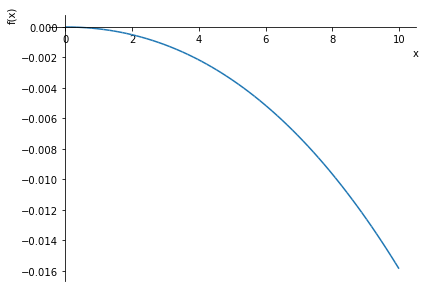

In [8]:
plot(ux(x),(x,0,L.subs(data)));